In [2]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter


#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt


#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

/Users/dostow/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_excel("/Users/dostow/documents/Python/EmployeeAttritionData.xlsx")
df_col_expand = df
df_expanded = pd.read_excel("/Users/dostow/documents/Python/EmployeeAttritionData.xlsx")


## Cleaning Data

In [4]:
travel_key = {"Travel_Rarely" : .5, "Travel_Frequently": 1, "Non-Travel": 0}
df = df.applymap(lambda s: travel_key.get(s) if s in travel_key else s)
dept_key = {"Sales": 1, "Research & Development": 2, "Human Resources": 3}
df = df.applymap(lambda s: dept_key.get(s) if s in dept_key else s)
education_key = {"Life Sciences": 1, "Medical": 2, "Marketing": 3, "Technical Degree": 4, "Other": 5}
df = df.applymap(lambda s: education_key.get(s) if s in education_key else s)
gender_marriage_Yes_key = {"Male": 0, "Female": 1, "Single": 1, "Married": 2, "Divorced": 3, "Yes": 1, "No": 0, "y": 1, "Y": 1}
df = df.applymap(lambda s: gender_marriage_Yes_key.get(s) if s in gender_marriage_Yes_key else s)
role_key = {'Sales Executive': 1, "Research Scientist" : 2, "Laboratory Technician": 3, 'Manufacturing Director': 4, 'Healthcare Representative':5, "Manager": 6, "Sales Representative": 7, "Research Director": 8, "sales executive": 1}
df = df.applymap(lambda s: role_key.get(s) if s in role_key else s)
df = df.drop(["StandardHours", "EmployeeCount", "Over18"], axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.5,1102,1,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,2,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0.5,1373,2,2,2,5,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,2,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0.5,591,2,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2


In [5]:
travel_dummies = pd.get_dummies(df_expanded.BusinessTravel).astype(int)
df_expanded = pd.concat([df_expanded, travel_dummies], axis = 1)
df_expanded.drop("BusinessTravel", inplace = True, axis =1)
dept_dummies = pd.get_dummies(df_expanded.Department).astype(int)
df_expanded = pd.concat([df_expanded, dept_dummies], axis = 1)
df_expanded.drop("Department", inplace= True, axis=1)
df_expandedield_dummies = pd.get_dummies(df_expanded.EducationField).astype(int)
df_expandedield_dummies = df_expandedield_dummies.rename(columns= {"Human Resources": "ed_HumanResources", "Life Sciences": "ed_LifeScience", "Marketing": "ed_Marketing", "Medical": "ed_Medical", "Other": "ed_Other", "Technical Degree": "ed_TechnicalDegree"})
df_expanded = pd.concat([df_expanded, df_expandedield_dummies], axis = 1)
df_expanded.drop("EducationField", inplace=True, axis=1)
married_dummies = pd.get_dummies(df_expanded.MaritalStatus).astype(int)
df_expanded = pd.concat([df_expanded, married_dummies], axis = 1)
df_expanded.drop("MaritalStatus", inplace = True, axis = 1)
gender_Yes_key = {"Male": 0, "Female": 1, "Yes": 1, "No": 0, "y": 1}
df_expanded = df_expanded.applymap(lambda s: gender_Yes_key.get(s) if s in gender_Yes_key else s)
job_dummies = pd.get_dummies(df_expanded.JobRole).astype(int)
df_expanded = pd.concat([df_expanded, job_dummies], axis=1)
df_expanded.drop("JobRole", inplace=True, axis = 1)
df_expanded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,1102,1,2,1,1,2,1,94,...,1,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,0,61,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,0,92,...,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,1,5,4,1,56,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,7,1,0,40,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df_col_expand.head()
travel_dummies = pd.get_dummies(df_col_expand.BusinessTravel).astype(int)
df_col_expand = pd.concat([df_col_expand, travel_dummies], axis = 1)
df_col_expand.drop("BusinessTravel", inplace = True, axis =1)

dept_dummies = pd.get_dummies(df_col_expand.Department).astype(int)
df_col_expand = pd.concat([df_col_expand, dept_dummies], axis = 1)
df_col_expand.drop("Department", inplace= True, axis=1)

edfield_dummies = pd.get_dummies(df_col_expand.EducationField).astype(int)
edfield_dummies = edfield_dummies.rename(columns= {"Human Resources": "ed_HumanResources", "Life Sciences": "ed_LifeScience", "Marketing": "ed_Marketing", "Medical": "ed_Medical", "Other": "ed_Other", "Technical Degree": "ed_TechnicalDegree"})
df_col_expand = pd.concat([df_col_expand, edfield_dummies], axis = 1)
df_col_expand.drop("EducationField", inplace=True, axis=1)

married_dummies = pd.get_dummies(df_col_expand.MaritalStatus).astype(int)
df_col_expand = pd.concat([df_col_expand, married_dummies], axis = 1)
df_col_expand.drop("MaritalStatus", inplace = True, axis = 1)

gender_Yes_key = {"Male": 0, "Female": 1, "Yes": 1, "No": 0, "y": 1}
df_col_expand = df_col_expand.applymap(lambda s: gender_Yes_key.get(s) if s in gender_Yes_key else s)
job_dummies = pd.get_dummies(df_col_expand.JobRole).astype(int)
df_col_expand = pd.concat([df_col_expand, job_dummies], axis=1)
df_col_expand.drop("JobRole", inplace=True, axis = 1)
df_col_expand = df_col_expand.drop(["StandardHours", "EmployeeCount", "Over18"], axis = 1)

df_col_expand.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,1102,1,2,1,2,1,94,3,...,1,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,2,3,0,61,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,4,0,92,2,...,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,5,4,1,56,3,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,7,1,0,40,3,...,0,0,0,1,0,0,0,0,0,0


## Understanding Data

In [8]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.543197,802.485714,1.739456,9.192517,2.912925,2.061224,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.266085,403.509100,0.527792,8.106864,1.024165,1.182033,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.500000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.500000,802.000000,2.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,0.500000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1.000000,1499.000000,3.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,0.031882,-0.001686,0.208034,-0.034303,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,-0.063991,0.077924,-0.031373,0.055560,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,0.002640,-0.009696,-0.008670,-0.017072,-0.018538,-0.011310,...,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.007109,-0.004985,-0.016806,-0.010852,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,0.002640,-0.007109,1.000000,-0.017225,-0.007996,-0.076982,0.010895,0.019395,...,0.024604,0.022414,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,-0.017225,1.000000,0.021042,0.008430,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,-0.007996,0.021042,1.000000,0.025775,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.034303,0.055560,-0.017072,-0.010852,-0.076982,0.008430,0.025775,1.000000,0.009414,0.060610,...,-0.015700,-0.005913,-0.020580,-0.028064,0.003601,0.050125,-0.019527,-0.009161,-0.021428,-0.003241
EmployeeNumber,-0.010145,-0.010577,-0.018538,-0.050990,0.010895,0.032916,0.042070,0.009414,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,0.019395,-0.016075,-0.027128,0.060610,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


In [10]:
df_col_expand.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,0.400000,65.891156,2.729932,...,0.319728,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,...,0.466530,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,0.000000,66.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_col_expand.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Single,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.036311,0.024287,0.029820,...,-0.119185,0.098825,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.029453,-0.006846,-0.130016,...,0.175419,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.011716,0.023381,0.046135,...,-0.075835,0.040141,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.001851,0.031131,0.008783,...,-0.027445,0.022916,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016547,0.016775,0.042438,...,0.004168,0.024270,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,-0.022556,0.035179,-0.006888,...,-0.035189,0.025945,0.067287,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.000508,-0.049857,-0.008278,...,0.009035,0.014090,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949
Gender,0.036311,-0.029453,0.011716,0.001851,0.016547,-0.022556,-0.000508,1.000000,0.000478,-0.017960,...,0.032752,-0.006823,-0.036082,-0.067793,0.033880,0.065197,0.006121,-0.009745,0.005348,0.028877
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,0.000478,1.000000,0.042861,...,-0.033436,0.014599,-0.016189,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,-0.017960,0.042861,1.000000,...,-0.045253,0.001272,-0.004952,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282


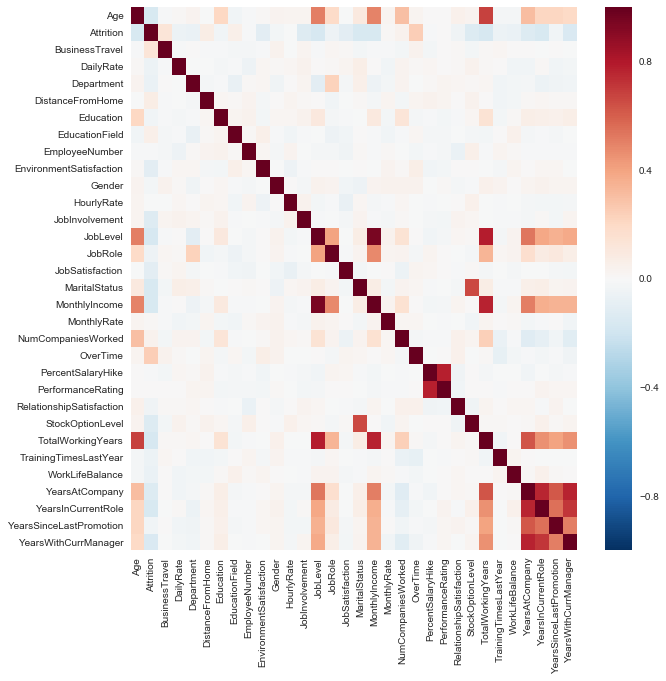

In [12]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), ax=ax)

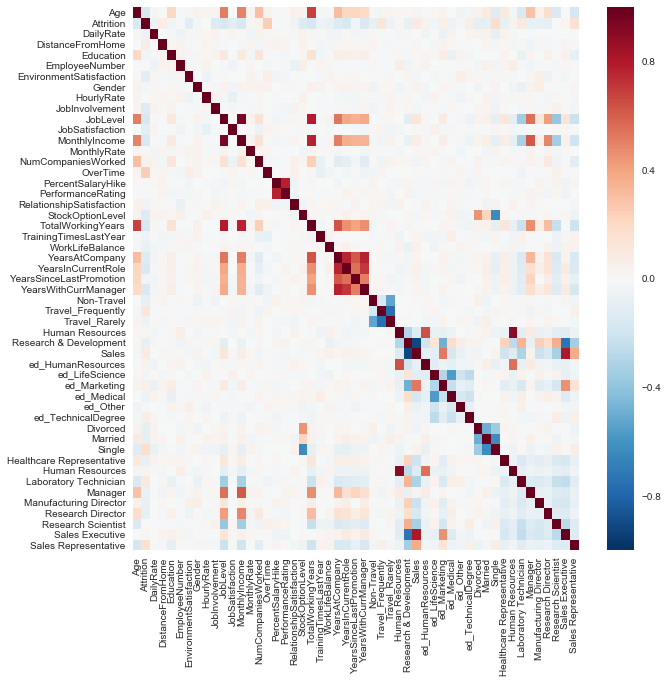

In [13]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_col_expand.corr(), ax=ax)

## Predicting Retention

In [49]:
X_rtn, y_rtn = df.drop("YearsAtCompany", axis = 1), df["YearsAtCompany"]
feature_names_rtn = X_rtn.columns.tolist()
target_name_rtn = df.columns.tolist()[-4]

In [54]:
X_rtn.columns.tolist()

[u'Age',
 u'Attrition',
 u'BusinessTravel',
 u'DailyRate',
 u'Department',
 u'DistanceFromHome',
 u'Education',
 u'EducationField',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobRole',
 u'JobSatisfaction',
 u'MaritalStatus',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager']

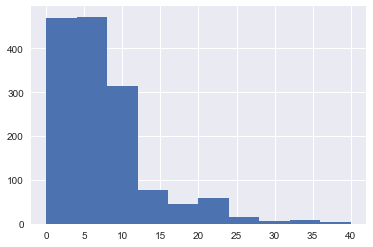

In [16]:
y_rtn.hist()

In [22]:
X_rtn, y_rtn = df.drop("YearsAtCompany", axis = 1), df["YearsAtCompany"]
feature_names_rtn = X_rtn.columns.tolist()
target_name_rtn = df.columns.tolist()[-4]

In [42]:
#Retention
from sklearn import tree

X_rtn_train, X_rtn_test, y_rtn_train, y_rtn_test = train_test_split(X_rtn, y_rtn, test_size = 0.3, random_state = 100)

decision_tree = DecisionTreeRegressor(max_depth = 2)
decision_tree.fit(X_rtn_train, y_rtn_train)

print "Decision Tree RSME:", np.sqrt(mean_squared_error(y_rtn_test, decision_tree.predict(X_rtn_test)))

Decision Tree RSME: 3.38214130822


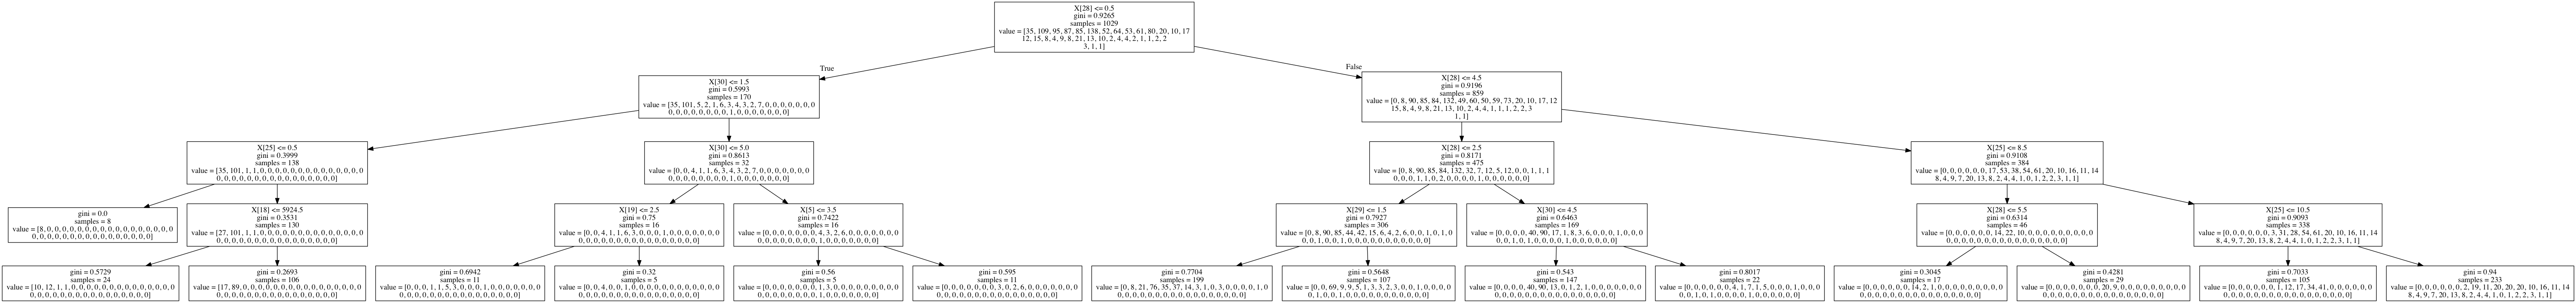

In [43]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, 
                                  max_depth = 4, min_samples_leaf = 5)
clf_gini.fit(X_rtn_train, y_rtn_train)
dot_data = tree.export_graphviz(clf_gini, out_file = None)
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [44]:
important_features = pd.DataFrame({'feature':feature_names_rtn, 'importance':clf_gini.feature_importances_})

important_features = important_features.sort_values(by="importance", ascending=False)
print important_features

                     feature  importance
28        YearsInCurrentRole    0.595905
25         TotalWorkingYears    0.137098
30      YearsWithCurrManager    0.127687
29   YearsSinceLastPromotion    0.106431
18               MonthlyRate    0.013333
19        NumCompaniesWorked    0.010205
5           DistanceFromHome    0.009341
16             MaritalStatus    0.000000
27           WorkLifeBalance    0.000000
26     TrainingTimesLastYear    0.000000
24          StockOptionLevel    0.000000
23  RelationshipSatisfaction    0.000000
22         PerformanceRating    0.000000
21         PercentSalaryHike    0.000000
20                  OverTime    0.000000
17             MonthlyIncome    0.000000
0                        Age    0.000000
1                  Attrition    0.000000
14                   JobRole    0.000000
13                  JobLevel    0.000000
12            JobInvolvement    0.000000
11                HourlyRate    0.000000
10                    Gender    0.000000
9    Environment

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_rtn, y_rtn = make_classification(n_samples=1000, n_features=31, n_informative=2, n_redundant=0, 
                          random_state=0, shuffle=False)
X_rtn_train, X_rtn_test, y_rtn_train, y_rtn_test = train_test_split(X_rtn, y_rtn, test_size=.4, random_state=42)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
clf_forest = RandomForestClassifier(max_depth=2, random_state=0)
clf_forest.fit(X_rtn_train,y_rtn_train)
important_features_forest = pd.DataFrame({'feature':feature_names_rtn, 'importance':clf_forest.feature_importances_})
important_features_forest = important_features_forest.sort_values(by="importance", ascending=False)

print "Important Features \n", important_features_forest


Important Features 
                     feature  importance
1                  Attrition    0.377569
28        YearsInCurrentRole    0.097643
3                  DailyRate    0.060488
9    EnvironmentSatisfaction    0.059508
0                        Age    0.048100
20                  OverTime    0.043564
26     TrainingTimesLastYear    0.043189
19        NumCompaniesWorked    0.040492
8             EmployeeNumber    0.040386
6                  Education    0.040168
12            JobInvolvement    0.037038
7             EducationField    0.034004
15           JobSatisfaction    0.027867
24          StockOptionLevel    0.027554
4                 Department    0.007188
14                   JobRole    0.006025
23  RelationshipSatisfaction    0.003153
21         PercentSalaryHike    0.002457
11                HourlyRate    0.001487
25         TotalWorkingYears    0.001355
22         PerformanceRating    0.000767
29   YearsSinceLastPromotion    0.000000
2             BusinessTravel    0.000

## Predicting Attrition

In [56]:
X, y = df.drop("Attrition", axis = 1), df["Attrition"]
feature_names = X.columns.tolist()
target_name = df.columns.tolist()[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.4, random_state =20)

In [57]:
decision_tree = DecisionTreeRegressor(max_depth = 2)
decision_tree.fit(X_train, y_train)

print "Decision Tree RMSE", np.sqrt(mean_squared_error(y_test, decision_tree.predict(X_test)))

Decision Tree RMSE 0.353741409092


In [58]:
from sklearn.tree import DecisionTreeClassifier
attrition_tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
attrition_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

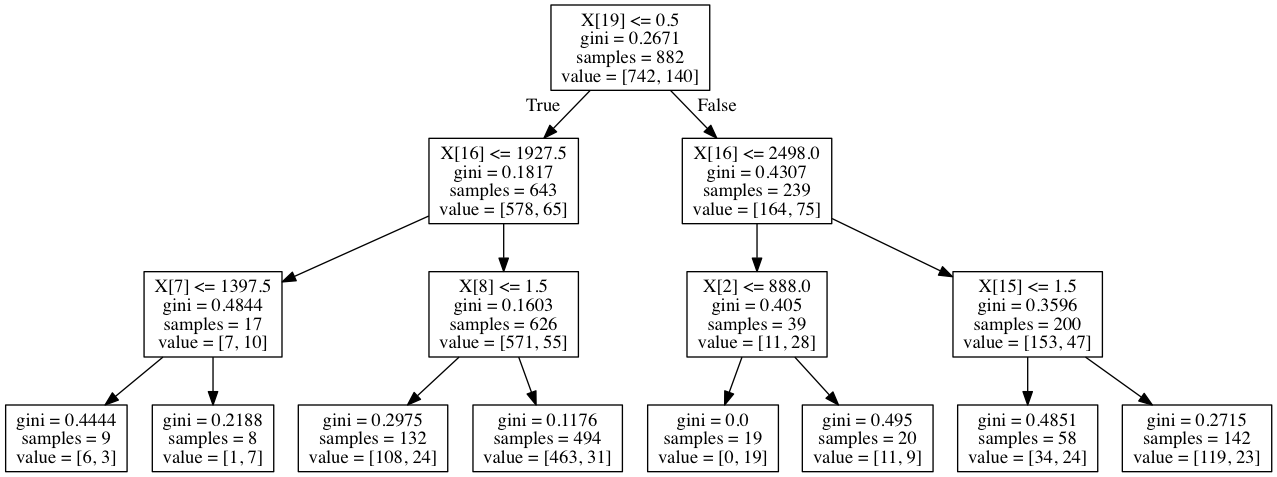

In [59]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 200, 
                                  max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_gini, out_file = None)
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [61]:
important_features_forest = pd.DataFrame({'feature':feature_names_rtn, 'importance':clf_gini.feature_importances_})
important_features_forest = important_features_forest.sort_values(by="importance", ascending=False)

print "Important Features \n", important_features_forest

Important Features 
                     feature  importance
16             MaritalStatus    0.421083
19        NumCompaniesWorked    0.282401
2             BusinessTravel    0.105574
15           JobSatisfaction    0.093537
8             EmployeeNumber    0.052894
7             EducationField    0.044510
28        YearsInCurrentRole    0.000000
27           WorkLifeBalance    0.000000
26     TrainingTimesLastYear    0.000000
18               MonthlyRate    0.000000
25         TotalWorkingYears    0.000000
24          StockOptionLevel    0.000000
23  RelationshipSatisfaction    0.000000
22         PerformanceRating    0.000000
21         PercentSalaryHike    0.000000
20                  OverTime    0.000000
29   YearsSinceLastPromotion    0.000000
0                        Age    0.000000
17             MonthlyIncome    0.000000
1                  Attrition    0.000000
14                   JobRole    0.000000
13                  JobLevel    0.000000
12            JobInvolvement    0.000